# Scikit-Learn
***

<br>

## Overview of scikit-learn python library
****

<br>

<h4>What is Scikit-Learn?</h4>
    <p>Scikit-Learn is a open source library, machine learning library in Python which features a variety of technology and algorithms,
    some of which will be demonstrated below.
    
It is considered the peak of Machine Learning, as it it is considering the easiest to understand and use and is well documented and with just some lines of code you can do so much, e.g. with just a few lines of code you can create a model that can predict outcomes just with the use other python technology and libraries.
    
Technology that many developers may be familiar with or is very common in Python includes Matplotlib, Pandas and NumPy.
    
Algorithms that are common in Scikit-Learn include Regression, Clustering, Model Learning and Classification.</p>

<br>

<h3> Algorithm #1</h3>

<h4>Handwritten digits recognition</h4>

****

In [1]:
# Standard Imports
import pandas as pd
import matplotlib.pyplot as plt  
import numpy as np
import seaborn as sn
import joblib

# Enabling inlnie plotting
%matplotlib inline

# Importing datasets, metrics and classifiers
from sklearn import svm, metrics, datasets
from sklearn.utils import shuffle
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [2]:
# Loading digits from dataset
digits = load_digits()
# Printing the dataset array
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [3]:
# returns all properties and methods of the specified object, without the values
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
# Printing the data type of the images attribute
print(type(digits.images))

# Printing the data type of target attribute
print(type(digits.target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [5]:
# Retrieving the shape of the array
digits.images.shape

(1797, 8, 8)

In [6]:
# Prininting values of 0 in an 8x8 array
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [7]:
# Printing the shape of the array of target attribute
print(digits.target.shape)

# Printing the target attribute
print(digits.target)

(1797,)
[0 1 2 ... 8 9 8]


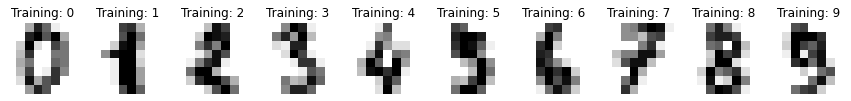

In [8]:
# Drawing multiple plots into one single figure
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(15, 7))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

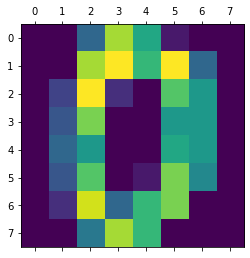

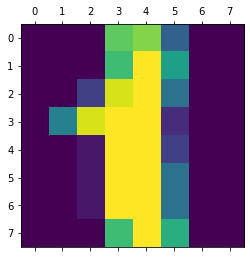

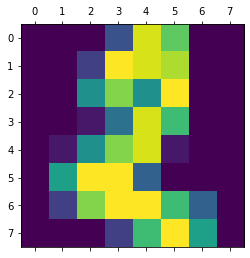

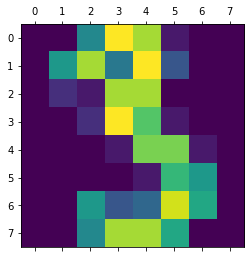

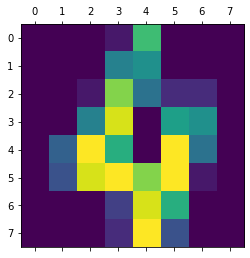

In [9]:
# Drawing the array as a matrix into one single figure
for i in range(5):
    plt.matshow(digits.images[i])

In [10]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [11]:
# Create a logistic regression classifier
clf = LogisticRegression(solver='lbfgs', max_iter=10000)

In [12]:
# Flattening the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Splitting data into train and test subsets
x_train, x_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.2
)

In [13]:
# Fitting on the train samples
clf.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [14]:
# Calculating the accuracy score
score = clf.score(x_test, y_test)

# Printing the score
print("Accuracy is :",round(score,2)*100,"%")

Accuracy is : 97.0 %


In [15]:
# Predicting the labels of the data values
clf.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

prediction:  0


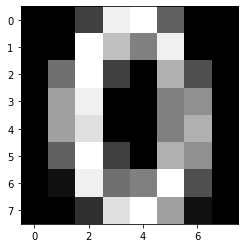

In [16]:
# Assigning 'prediction' the value of the prediction of the x_test subset
prediction = clf.predict(x_test)

# Showing the images and the labels
index = 3
plt.imshow(np.reshape(x_test[index],(8,8)), cmap = "gray")
print("prediction: ", clf.predict([x_test[index]])[0])

In [17]:
# Printing a confusion matrix of true and predicted values
print(f"Confusion Matrix:\n")
cm = confusion_matrix(y_test, prediction)
cm

Confusion Matrix:



array([[44,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 45,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 39,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 33,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 30,  2,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 32,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 31,  0,  0],
       [ 0,  4,  0,  0,  0,  1,  0,  0, 28,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 34]])

Text(69.0, 0.5, 'Truth')

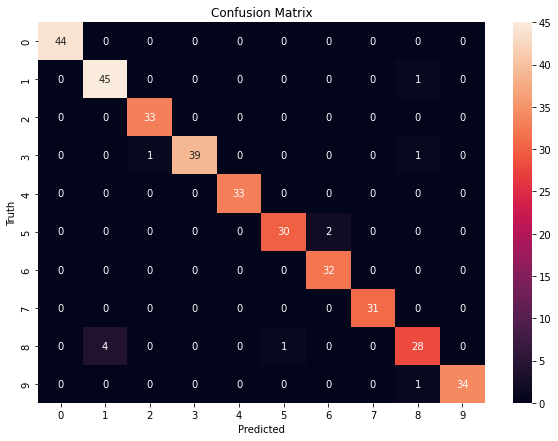

In [18]:
# Plotting the confusion matrix
plt.figure(figsize = (10, 7))
plt.title("Confusion Matrix")

# Representing data in a heatmap (two dimensional graph)
sn.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

<br>

<h3> Algorithm #2</h3>

<h4>Decision Trees</h4>

****

In [19]:
# Standard imports
import pandas as pd
import matplotlib.pyplot as plt  
import numpy as np
import seaborn as sn

# Enabling inline ploting
%matplotlib inline

# Importing datasets, metrics and classifiers
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay

In [20]:
# Reading in the imported dataset
df = pd.read_csv('processed.cleveland.data', header=None)

# Retrieves the first 5 rows of the dataframe
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [21]:
# Retrieves the data types of each column in the dataframe
df.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11     object
12     object
13      int64
dtype: object

In [22]:
# Changing column numbers to names
df.columns = ['age',
             'gender',
             'chest_pain',
             'resting_bp',
             'cholesterol',
             'fasting_bs',
             'resting_ecg',
             'thalach',
             'exang',
             'oldpeak',
             'slope',
             'ca',
             'thal',
             'hd']

# Retrieves the first 5 rows of the dataframe with the new column names
df.head()

,age,gender,chest_pain,resting_bp,cholesterol,fasting_bs,resting_ecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [23]:
# Retrieves the data types of each column in the dataframe with the new column names
df.dtypes

age            float64
gender         float64
chest_pain     float64
resting_bp     float64
cholesterol    float64
fasting_bs     float64
resting_ecg    float64
thalach        float64
exang          float64
oldpeak        float64
slope          float64
ca              object
thal            object
hd               int64
dtype: object

In [24]:
# Retrieving unique values in coumn 'ca'
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [25]:
# Retrieving unique values in coumn 'thal'
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [26]:
# Retrieves the length number of  missing values
len(df.loc[(df['ca'] == '?') | (df['thal'] == '?')])

6

In [27]:
# Retrieves rows with missing values
df.loc[(df['ca'] == '?') | (df['thal'] == '?')]

,age,gender,chest_pain,resting_bp,cholesterol,fasting_bs,resting_ecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [28]:
# Retrieves the number of rows in dataset
len(df)

303

In [29]:
# Selects all rows with missing values and sames them in a new dataframe (df_no_missing)
df_no_missing = df.loc[(df['ca'] != '?') & (df['thal'] != '?')]

In [30]:
# Retrieves the number of rows in dataset since the 6 missing value have been moved
len(df_no_missing)

297

In [31]:
# Retrieving the unique 'ca' values
df_no_missing['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [32]:
# Retrieving the unique 'thal' values
df_no_missing['thal'].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

In [33]:
# Craeting a new copy of the columns used to make predictions
x = df_no_missing.iloc[:,:-1]

# Retrieving first 5 rows of new copy
x.head()

,age,gender,chest_pain,resting_bp,cholesterol,fasting_bs,resting_ecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [34]:
# Craeting a new copy of the columns data we want to predict
y = df_no_missing['hd'].copy()

# Retrieving first 5 rows of new copy
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

In [35]:
# Retrieves the data types of x
x.dtypes

age            float64
gender         float64
chest_pain     float64
resting_bp     float64
cholesterol    float64
fasting_bs     float64
resting_ecg    float64
thalach        float64
exang          float64
oldpeak        float64
slope          float64
ca              object
thal            object
dtype: object

In [36]:
# Retrieving the unique 'chest_pain' values
x['chest_pain'].unique()

array([1., 4., 3., 2.])

In [37]:
# Converting 'chest_pain' into 0's and 1's with One Hot Encoding and retrieving first 5 rows after datframe is encoded
pd.get_dummies(x, columns = ['chest_pain']).head()

,age,gender,resting_bp,cholesterol,fasting_bs,resting_ecg,thalach,exang,oldpeak,slope,ca,thal,chest_pain_1.0,chest_pain_2.0,chest_pain_3.0,chest_pain_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,1,0,0,0
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,0,0,1
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,1,0
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1,0,0


In [38]:
# Converting 'chest_pain', 'resting_ecg', 'slope' and 'thal' into 0's and 1's with One Hot Encoding
x_encoding = pd.get_dummies(x, columns = ['chest_pain', 'resting_ecg', 'slope', 'thal'])

# Retrieving first 5 rows after datframe is encoded
x_encoding.head()

,age,gender,resting_bp,cholesterol,fasting_bs,thalach,exang,oldpeak,ca,chest_pain_1.0,...,chest_pain_4.0,resting_ecg_0.0,resting_ecg_1.0,resting_ecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


In [39]:
# Verifying y contains only 0's and 1's
y.unique()

array([0, 2, 1, 3, 4])

In [40]:
# Retrieving the index for each non-zero value in y
y_not_zero_index = y > 0

# Setting non-zero value in y to 1
y[y_not_zero_index] = 1

# Verifying y contains only 0's and 1's
y.unique()

array([0, 1])

In [41]:
# Splitting data into train and test subsets
x_train, x_test, y_train, y_test = train_test_split(
    x_encoding, y, random_state=42
)

# Creating a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Fitting on the train samples
clf = clf.fit(x_train, y_train)

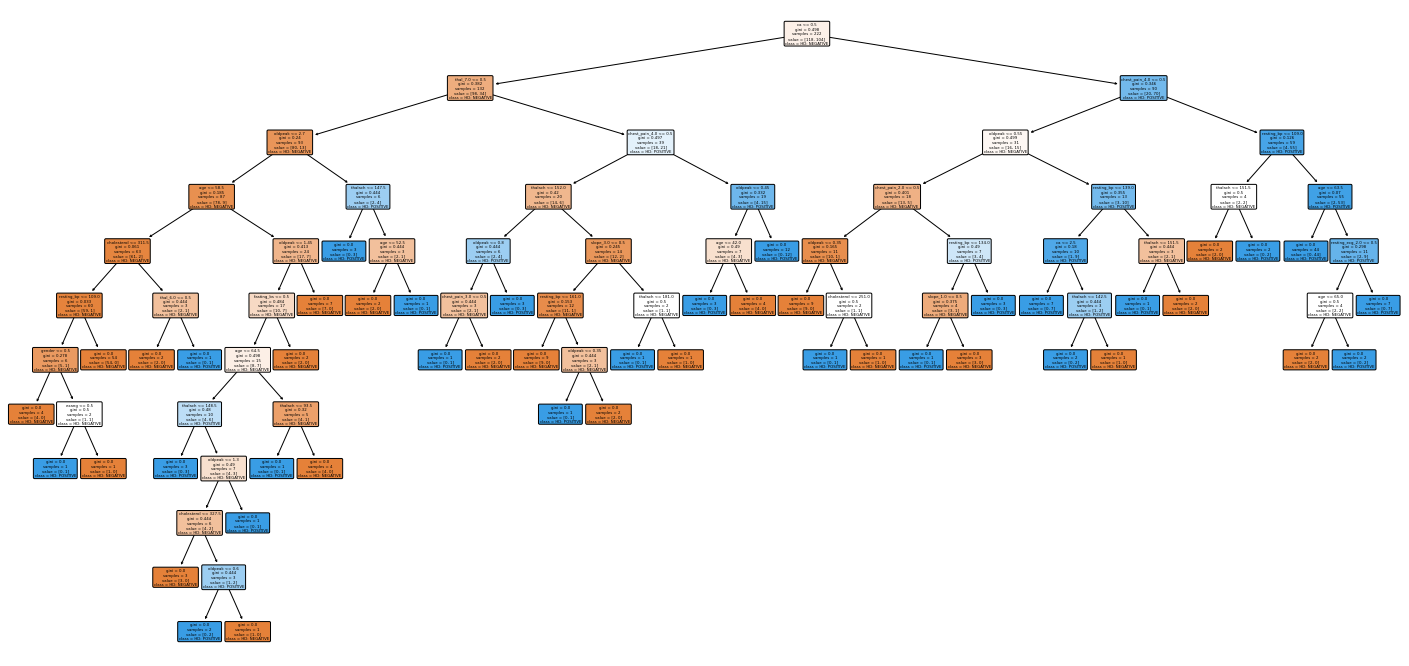

In [42]:
# Plotting data in a decision tree
plt.figure(figsize = (25, 12))
plot_tree(
    clf, filled=True, rounded=True, class_names=["HD: NEGATIVE", "HD: POSITIVE"], feature_names=x_encoding.columns
);

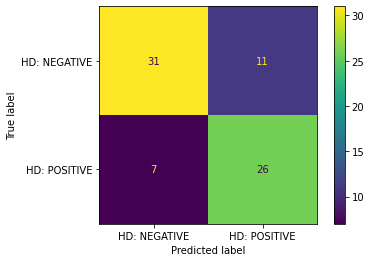

In [43]:
# Plotting the confusiom matrix of of positive and negative patients
ConfusionMatrixDisplay.from_estimator(
    clf, x_test, y_test, display_labels=["HD: NEGATIVE", "HD: POSITIVE"])

plt.show()

In [44]:
# Determining values for alpha
path = clf.cost_complexity_pruning_path(x_train, y_train)

# Extracting different values for alpha
alphas = path.ccp_alphas

# Exlucding th max value for alpha
alphas = alphas[:-1]

# Retrieving data in alpha
alphas

array([0.        , 0.00295295, 0.003861  , 0.00405405, 0.004095  ,
       0.00429358, 0.00514801, 0.00541298, 0.00578761, 0.00600601,
       0.00600601, 0.00600601, 0.00667591, 0.00675676, 0.00757375,
       0.00811505, 0.00868726, 0.00889851, 0.01038181, 0.0105777 ,
       0.01422475, 0.01604051, 0.01642461, 0.02103075, 0.03680006,
       0.03934523])

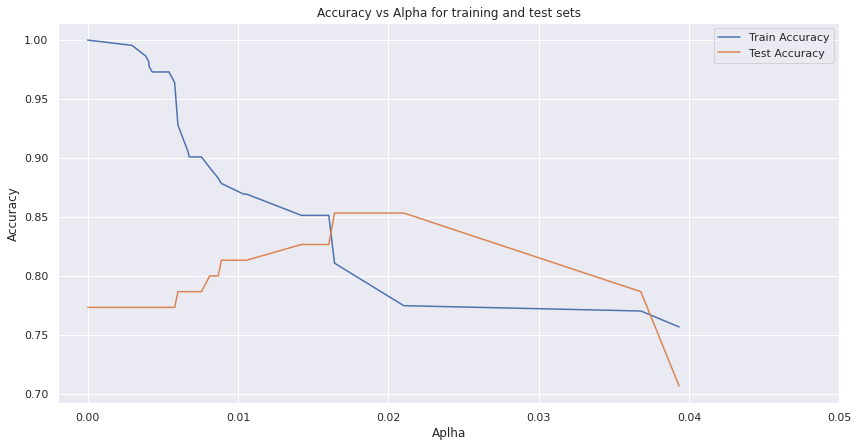

In [45]:
# Creating an array to put in decision tree
clf_dt = []

# Creating one dicison tree per value to store in the array
for i in alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=i)
    clf.fit(x_train, y_train)
    clf_dt.append(clf)
    
# Using training and test datasets as a function of alpha
accuracy_train = [clf.score(x_train, y_train) for clf in clf_dt]
accuracy_test = [clf.score(x_test, y_test) for clf in clf_dt]

# Plotting the accuracy of the training and test datasets
sn.set()
plt.figure(figsize = (14, 7))
ax = sn.lineplot(y=accuracy_train, x=alphas, label="Train Accuracy")
ax = sn.lineplot(y=accuracy_test, x=alphas, label="Test Accuracy")
ax.set_title("Accuracy vs Alpha for training and test sets")
ax.set(xlabel="Aplha", ylabel = "Accuracy")
plt.xticks(ticks=np.arange(0.00,0.06,0.01))
plt.show()

<AxesSubplot:xlabel='tree'>

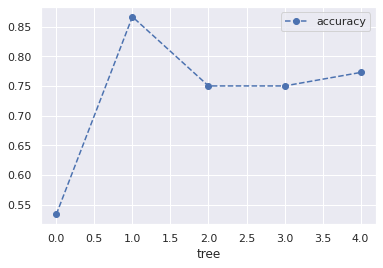

In [46]:
# Creating data with ccp_alpha tree
clf = DecisionTreeClassifier(random_state=42, ccp_alpha=0.016)

# Using cross validation creating 5 training and testing datasets needed to train and test data
scores  = cross_val_score(clf, x_train, y_train, cv=5)
df = pd.DataFrame(data={'tree': range(5), 'accuracy': scores})

# Plotting that data after cross validation
df.plot(x='tree', y='accuracy', marker='o', linestyle='--')

<AxesSubplot:xlabel='alpha'>

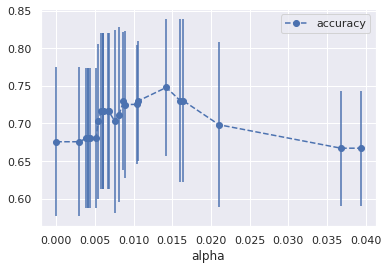

In [47]:
# Creating an array to store results of each fold during cross validation
alpha_loop = []

# Running cross validation for each candidate value and storing mean accuracy and standard deviation of the scores
for i in alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=i)
    scores = cross_val_score(clf, x_train, y_train, cv=5)
    alpha_loop.append([i, np.mean(scores), np.std(scores)])

# Ploting graph of mean accuracy and standard deviation of scores for each candidate value
alpha_results = pd.DataFrame(alpha_loop, columns=['alpha', 'accuracy', 'std'])
alpha_results.plot(x='alpha', y='accuracy', yerr='std', marker='o', linestyle='--')

In [48]:
# Setting ccp_alpha closer to 0.014
alpha_results[(alpha_results['alpha'] > 0.014) & (alpha_results['alpha'] < 0.015)]

,alpha,accuracy,std
20,0.014225,0.747778,0.091395


In [49]:
# Stroing ideal value for alpha
ideal_alpha = alpha_results[(alpha_results['alpha'] > 0.014) & (alpha_results['alpha'] < 0.015)]['alpha']
ideal_alpha

20    0.014225
Name: alpha, dtype: float64

In [50]:
# Converting ideal value from series to a float value
ideal_alpha = float(ideal_alpha)
ideal_alpha

0.014224751066856332

In [51]:
# Building a new dicision tree , using optimal value for alpha
# Otherwise known as pruning the tree
prune = DecisionTreeClassifier(random_state=0, ccp_alpha=ideal_alpha)
prune = prune.fit(x_train, y_train)

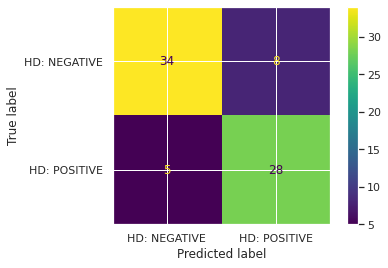

In [52]:
# Plotting confusion matrix in a pruned tree
ConfusionMatrixDisplay.from_estimator(
    prune, x_test, y_test, display_labels=["HD: NEGATIVE", "HD: POSITIVE"])

plt.show()

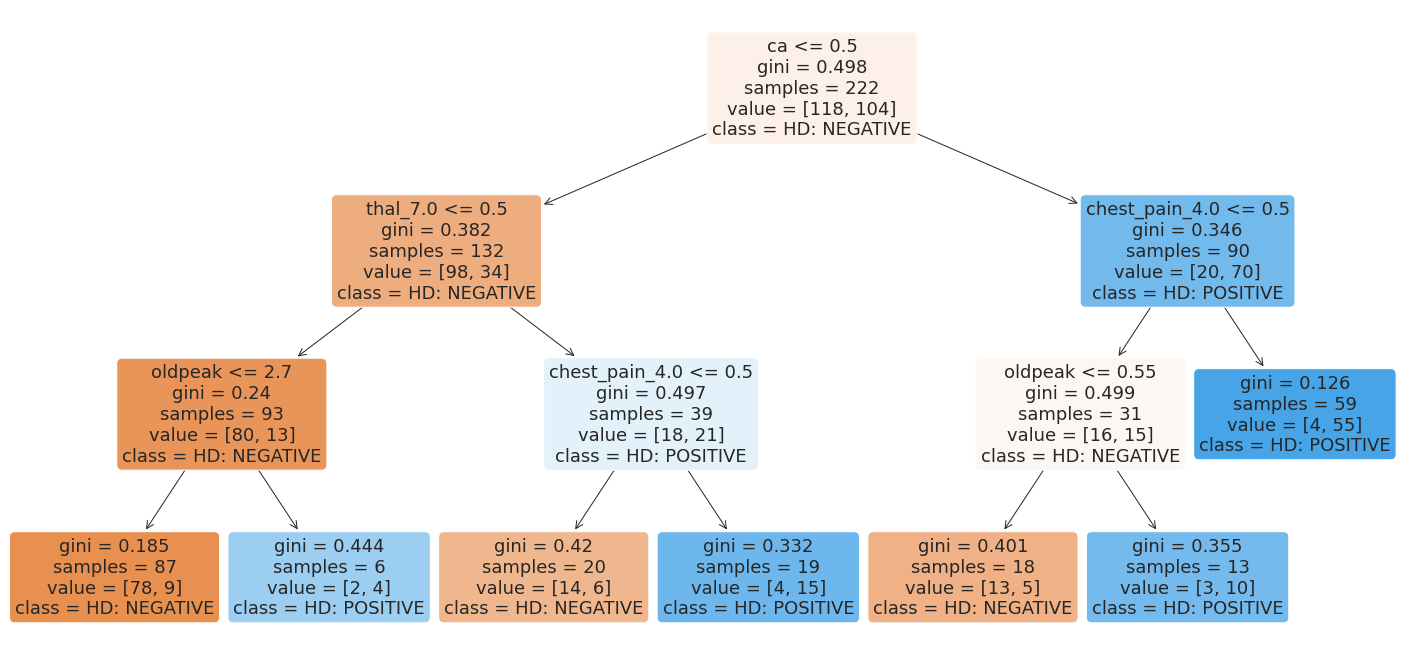

In [53]:
# Plotting the pruned tree in a plot tree
plt.figure(figsize = (25, 12))
plot_tree(
    prune, filled=True, rounded=True, class_names=["HD: NEGATIVE", "HD: POSITIVE"], feature_names=x_encoding.columns
);

<br>

<h3> Algorithm #3</h3>

<h4>Linear Regression</h4>

****

In [54]:
# Standard imports
import pandas as pd
import matplotlib.pyplot as plt  
import numpy as np
import seaborn as sn

# Enabling inline plotting
%matplotlib inline

# Importing datasets, metrics and classifiers
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [55]:
# Reading in the imported dataset
df = pd.read_csv("combined_process_power_plant.csv")

# Retrieves the first 5 rows of the dataframe
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [56]:
# Retrieves the shape of the array of the dataframe
df.shape

(9568, 5)

In [57]:
# Viewing count, mean, std, min. max and percentiles of the dataframe
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


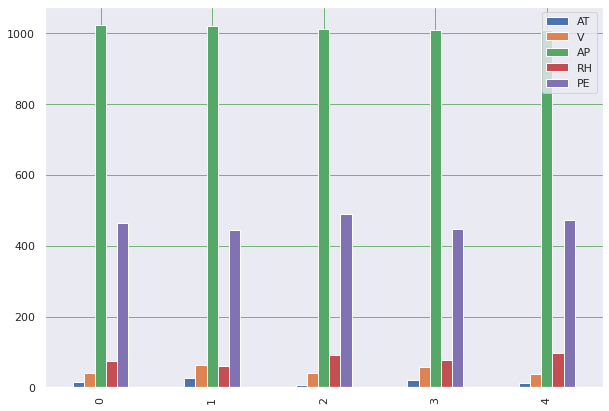

In [58]:
# Plotting the first 5 rows of the dataframe using grid lines
df1 = df.head(5)
df1.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [59]:
# Defining x and y value
# Deleting the 'PE' rows from dataframe
x = df.drop(['PE'], axis=1)
y = df['PE']

In [60]:
# Prining the x value
print(x)

         AT      V       AP     RH
0     14.96  41.76  1024.07  73.17
1     25.18  62.96  1020.04  59.08
2      5.11  39.40  1012.16  92.14
3     20.86  57.32  1010.24  76.64
4     10.82  37.50  1009.23  96.62
...     ...    ...      ...    ...
9563  16.65  49.69  1014.01  91.00
9564  13.19  39.18  1023.67  66.78
9565  31.32  74.33  1012.92  36.48
9566  24.48  69.45  1013.86  62.39
9567  21.60  62.52  1017.23  67.87

[9568 rows x 4 columns]


In [61]:
# Printing the y value
print(y)

0       463.26
1       444.37
2       488.56
3       446.48
4       473.90
         ...  
9563    460.03
9564    469.62
9565    429.57
9566    435.74
9567    453.28
Name: PE, Length: 9568, dtype: float64


In [62]:
# Finding the correlation in dataframe
df.corr()

,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000


<AxesSubplot:>

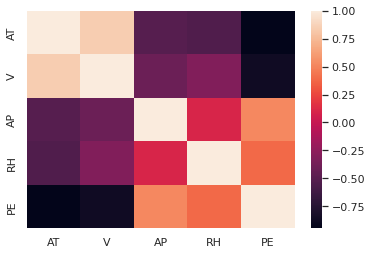

In [63]:
# Plotting the correlation of dataframe in a heatmap  (two dimensional graph)
sn.heatmap(df.corr())

In [64]:
# Splitting data into train and test subsets
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=0
)

In [65]:
# Create a  logistic regression classifier
clf = linear_model.LinearRegression()

# Fitting on the train samples
clf.fit(x_train, y_train)

LinearRegression()

In [66]:
# Assigning 'prediction' the value of the prediction of the x_test subset
prediction = clf.predict(x_test)

# Prining the prediction
print(prediction)

[431.42761597 458.56124622 462.75264705 ... 469.51835895 442.41759454
 461.88279939]


In [67]:
# Predicting test set results
clf.predict([[14.96,41.76,1024.07,73.17]])

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([467.29723807])

In [68]:
# Calculating coefficient of determination
r2_score(y_test, prediction)

0.9325315554761302

In [69]:
# Printing the intercept (the point where the regression crosses the y-xis)
print("Intercept: \n",clf.intercept_)

Intercept: 
 452.84103716163804


In [70]:
# Printing the coefficient of prediction of each of the targets
print("Coefficients: \n", clf.coef_)

Coefficients: 
 [-1.97313099 -0.23649993  0.06387891 -0.15807019]


In [71]:
# Printing the calculation of the mean absolute error, mean squared error and root mean squared error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

Mean Absolute Error: 3.566564655203822
Mean Squared Error: 19.733699303497648
Root Mean Squared Error: 4.442262858442491


In [72]:
# Retrieving the coefficient of each of the columns
coeff_df = pd.DataFrame(clf.coef_, x.columns, columns=['Coefficient'])
coeff_df

,Coefficient
AT,-1.973131
V,-0.236500
AP,0.063879
RH,-0.158070


In [73]:
# Calculating the accuracy score
score = clf.score(x_test, y_test)

# Printing the score
print("Accuracy is :",round(score,2)*100,"%")

Accuracy is : 93.0 %


Text(0.5, 1.0, 'Truth vs. Predicted')

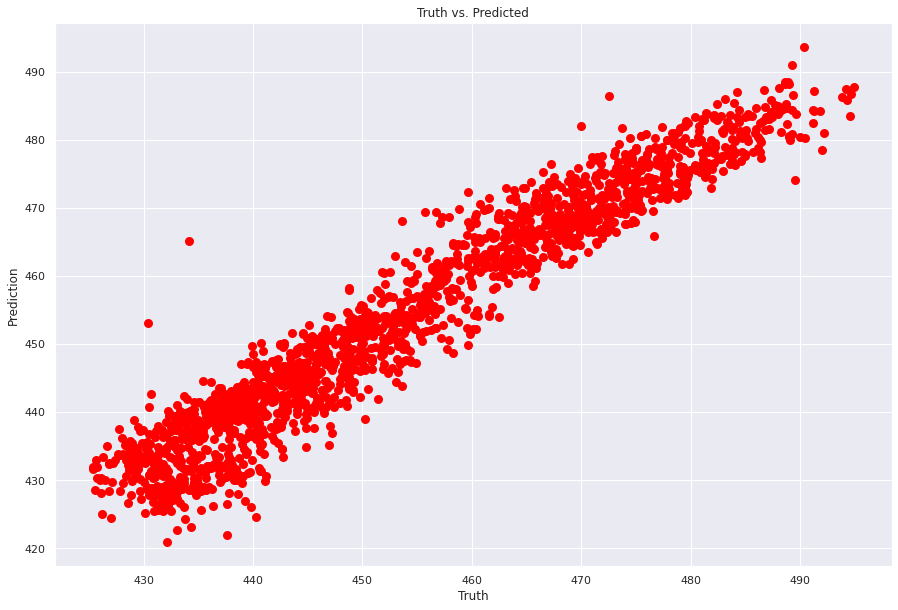

In [74]:
# Plotting values in a scatter plot
plt.figure(figsize=(15, 10))
plt.scatter(y_test, prediction, color="red", linewidth=3)
plt.xlabel('Truth')
plt.ylabel('Prediction')
plt.title('Truth vs. Predicted')

In [75]:
# Retrieving the actual values, predicted values and coefficient of the first 20 rows in the dataframe
predict = pd.DataFrame({'Truth': y_test, 'Predicted': prediction, 'Difference': y_test-prediction})
predict[0:20]

,Truth,Predicted,Difference
4834,431.23,431.427616,-0.197616
1768,460.01,458.561246,1.448754
2819,461.14,462.752647,-1.612647
7779,445.90,448.595962,-2.695962
7065,451.29,457.870777,-6.580777
9482,432.68,429.693839,2.986161
9,477.50,473.041853,4.458147
4986,459.68,456.508363,3.171637
6168,477.50,474.340491,3.159509
3664,444.99,446.343029,-1.353029


****

## End